In [2]:
import numpy as np
import scipy.fftpack as fft
import numpy.random as rnd
import matplotlib.pyplot as plt
from scipy import signal
from time import perf_counter as timer

In [3]:
def create_sig(Fs, f, window_percent, shift, noise_var):
    # Create carrier waves
    PIT = 1  # Process Time
#     Fs = 10e3  # Sampling Freq
    Freq = f  # Jammer Freq
    NumSamples = PIT * Fs  # Number of samples to process
    PRN_var = 1.5
    t = np.arange(0, NumSamples - 1, 1) / Fs  # time samples
    f = np.arange(0, NumSamples - 1, 1) / PIT  # Frequency Samples
    CWa = 1 * np.exp(2j * np.pi * Freq * t)  # Simulate a complex sin signal with specific frequency
    CWa = CWa + np.sqrt(PRN_var) * rnd.randn(len(CWa)) + np.sqrt(PRN_var) * 1j * rnd.randn(len(CWa))
    
    # zero pad and window the second signal, shift also
    sig_a = CWa
    window_size = int((window_percent)/100*len(sig_a))
    window_loc = int((NumSamples - window_size)/2)
    leading_zeros = np.zeros(window_loc + shift)
    trailing_zeros = np.zeros(window_loc - shift)
    sig_b = np.append(leading_zeros,sig_a[window_loc:window_loc+window_size])
    sig_b = np.append(sig_b, trailing_zeros)
    
    # Add noise idividually to each signal 
    var = noise_var
    sig_a = sig_a + np.sqrt(var) * rnd.randn(len(sig_a)) + np.sqrt(var) * 1j * rnd.randn(len(sig_a))
    sig_b = sig_b + np.sqrt(var) * rnd.randn(len(sig_b)) + np.sqrt(var) * 1j * rnd.randn(len(sig_b))
    
#     # Plot the signals
#     plt.figure()
#     plt.title('Signals before corr')
#     plt.plot(sig_a.real)
#     plt.plot(sig_b.real)
#     plt.legend(['sig_a', 'sig_b'])
    
    return sig_a, sig_b

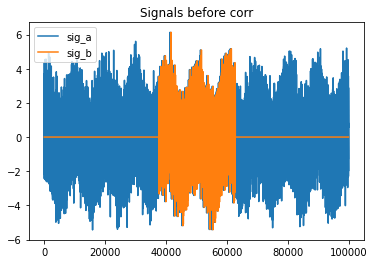

In [96]:
sig_a, sig_b = create_sig(10e4, 10, 25, 300, 0)

# FFT Manual Correlation

cross correlation = inv_fft(fft(A) * conj(fft(B)))

In [6]:
def fft_ccor(a, b):
    fft_a = fft.fft(a)
    fft_b = np.conj((fft.fft(b)))
    fft_crosscorr = np.fft.fftshift(np.fft.ifft(fft_a * fft_b))
    return fft_crosscorr

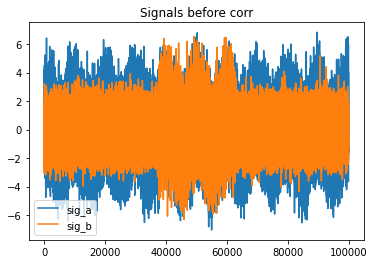

In [119]:
sig_a, sig_b = create_sig(10e4, 10, 25, 300, 1.0)
# sig_c, sig_d = create_sig(10, 25, 400, 0.001)

In [120]:
cc_1 = fft_ccor(sig_a, sig_b)
# cc_2 = fft_ccor(sig_c, sig_d)

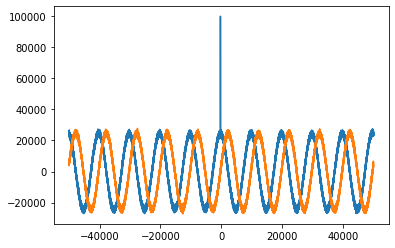

In [121]:

half_size = int(len(cc_1.real)/2)
shift = np.arange(-half_size, half_size+1)
plt.plot(shift, cc_1.real)
plt.plot(shift, cc_1.imag)

# plt.plot(cc_2.real)
# plt.plot(cc_2.imag)
# plt.xlim([-500,500])

In [122]:
shift[np.argmax(cc_1)]


-300

# Scipy correlation 

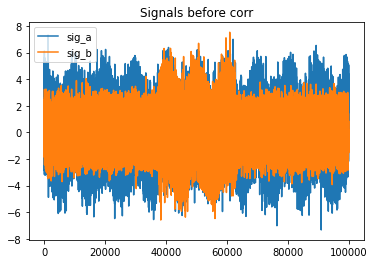

In [123]:
sig_a, sig_b = create_sig(10e4, 10, 25, 300, 1.0)

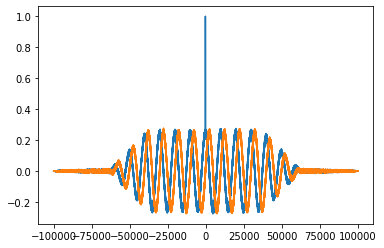

In [124]:
# Correlate

corr = signal.correlate(sig_a, sig_b)
corr /= np.max(corr)

half_size = int(len(corr.real)/2)
shift = np.arange(-half_size, half_size+1)
plt.plot(shift, corr.real)
plt.plot(shift, corr.imag)
# plt.plot(abs(corr))

# plt.xlim([-100, 100])

In [114]:
half_range = int(len(corr)/2)
t = list(range(-half_range,half_range+1))
t[np.argmax(corr.real)]

-300

In [ ]:
b

# Compare speeds

In [11]:
# Signals
sig_a, sig_b = create_sig(10e5, 10, 99, 300, 1.0)


In [12]:
# FFT Corr
times = []
for i in range(100):
    tic = timer()
    cc_1 = fft_ccor(sig_a, sig_b)
    toc = timer()
    times.append(toc-tic)
av = np.average(np.array(times))
tot = np.sum(np.array(times))
print(f'Average time: {av}s')
print(f'Total time: {tot}s')

Average time: 0.2821312716403918s
Total time: 28.21312716403918s


In [13]:
# Scipy Corr
times = []
for i in range(100):
    tic = timer()
    cc_1 = signal.correlate(sig_a, sig_b)
    toc = timer()
    times.append(toc-tic)
av = np.average(np.array(times))
tot = np.sum(np.array(times))
print(f'Average time: {av}s')
print(f'Total time: {tot}s')

Average time: 0.2803790097397723s
Total time: 28.03790097397723s
